#**Proyecto Final**


## Programación Orientada a Objetos
### Finanzas Cuantitativas

**Profesor**: Dr. Julio Cesar Galindo Lopez

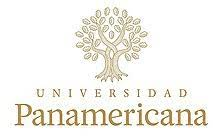


**Integrantes:**


Mariana Caraveo Enríquez

Regina Orozco Guadalajara

Antonio Ortiz Andrade

In [ ]:
# Elegiremos 5 acciones importadas de yahoo finance para optimizar un portafolio

In [ ]:
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
#Importamos librerías
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from pandas.plotting import scatter_matrix
from pypfopt.efficient_frontier import EfficientFrontier

In [ ]:
#Vamos a descargar los cinco tickers de las acciones con sus adecuadas fechas iniciales y finales
fecha_inicial='2019-12-31'
fecha_final='2023-01-01'

In [ ]:
#américa móvil,cuervo,genoma lab,inmobiliaria vesta,walmart
amxb=yf.download('AMXB.MX',fecha_inicial,fecha_final)
cuervo=yf.download('CUERVO.MX',fecha_inicial,fecha_final)
labb=yf.download('LABB.MX',fecha_inicial,fecha_final)
vesta=yf.download('VESTA.MX',fecha_inicial,fecha_final)
walmex=yf.download('WALMEX.MX',fecha_inicial,fecha_final)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Con esto sólo le pedimos que nos muestre en el dataframe la columna de precios
tickers=['AMXB.MX','CUERVO.MX','LABB.MX','VESTA.MX','WALMEX.MX']
datos=yf.download(tickers,fecha_inicial,fecha_final)['Close']
datos

[*********************100%%**********************]  5 of 5 completed


,AMXB.MX,CUERVO.MX,LABB.MX,VESTA.MX,WALMEX.MX
Date,,,,,
2019-12-31,15.300000,35.320000,18.580000,33.990002,54.180000
2020-01-02,15.300000,35.040001,18.780001,34.150002,55.119999
2020-01-03,15.760000,34.970001,18.790001,34.820000,54.689999
2020-01-06,15.600000,35.075001,18.820000,34.285000,55.275002
2020-01-07,15.600000,34.910000,18.900000,34.000000,54.980000
...,...,...,...,...,...
2022-12-26,17.799999,43.500000,16.850000,46.750000,71.099998
2022-12-27,17.799999,43.099998,16.920000,46.430000,71.029999
2022-12-28,17.799999,42.660000,16.490000,45.669998,70.000000


In [ ]:
#Con .pct_change() calculamos los rendimientos de la columna de close y eliminamos los datos que estén vacios con dropna
rendimientos=datos.pct_change().dropna()
rendimientos

,AMXB.MX,CUERVO.MX,LABB.MX,VESTA.MX,WALMEX.MX
Date,,,,,
2020-01-02,0.000000,-0.007927,0.010764,0.004707,0.017350
2020-01-03,0.030065,-0.001998,0.000532,0.019619,-0.007801
2020-01-06,-0.010152,0.003003,0.001597,-0.015365,0.010697
2020-01-07,0.000000,-0.004704,0.004251,-0.008313,-0.005337
2020-01-08,0.017308,-0.000286,-0.010053,0.004706,0.013278
...,...,...,...,...,...
2022-12-26,0.000000,0.013277,-0.005313,-0.000428,-0.012226
2022-12-27,0.000000,-0.009195,0.004154,-0.006845,-0.000985
2022-12-28,0.000000,-0.010209,-0.025414,-0.016369,-0.014501


In [ ]:
#Anualizamos los rendimientos promedios
mu=(1+rendimientos.mean())**252-1
mu

AMXB.MX      0.101264
CUERVO.MX    0.113329
LABB.MX      0.033237
VESTA.MX     0.154561
WALMEX.MX    0.125208
dtype: float64

In [ ]:
#Calculamos la varianza de cada uno de los tickers
varianza=rendimientos.var()*100
varianza

AMXB.MX      0.030493
CUERVO.MX    0.036270
LABB.MX      0.051556
VESTA.MX     0.033507
WALMEX.MX    0.030298
dtype: float64

In [ ]:
#De igual manera calculamos la desviación estándar para ver el riesgo que tiene cada acción
rendimientos.std()*100

AMXB.MX      1.746217
CUERVO.MX    1.904459
LABB.MX      2.270589
VESTA.MX     1.830478
WALMEX.MX    1.740639
dtype: float64

In [ ]:
#Ahora vamos a sacar la matriz de covarianza entre tickers para ver qué tanto se relacionan unos con otros
s=rendimientos.cov()
s

,AMXB.MX,CUERVO.MX,LABB.MX,VESTA.MX,WALMEX.MX
AMXB.MX,0.000305,0.000002,0.000016,0.000007,0.000020
CUERVO.MX,0.000002,0.000363,0.000047,0.000027,0.000035
LABB.MX,0.000016,0.000047,0.000516,0.000083,0.000035
VESTA.MX,0.000007,0.000027,0.000083,0.000335,0.000057
WALMEX.MX,0.000020,0.000035,0.000035,0.000057,0.000303


In [ ]:
#vamos a optimizar los weights que necesita tener cada acción
ef = EfficientFrontier(mu,s)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
#ahora lo vamos a convertir en un data frame
weights_df = pd.DataFrame.from_dict(cleaned_weights, orient='index', columns=['Weight'])
weights_df

,Weight
AMXB.MX,0.23447
CUERVO.MX,0.20070
LABB.MX,0.00000
VESTA.MX,0.32843
WALMEX.MX,0.23641


In [ ]:
#sacamos con lo siguiente los datos de rendimiento esperado, volatilidad y el sharpe ratio
ef.portfolio_performance(verbose=True)

Expected annual return: 12.7%
Annual volatility: 1.0%
Sharpe Ratio: 10.50


(0.12685025512191395, 0.010179167031474538, 10.496954691039763)

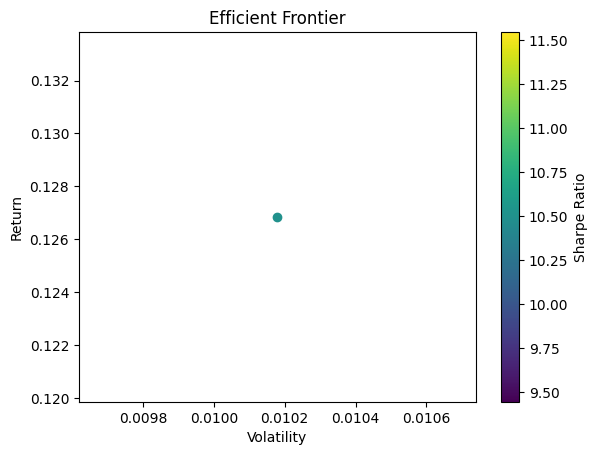

In [ ]:
# Graficar el gráfico de dispersión de los puntos de la cartera
plt.scatter(ef.portfolio_performance()[1], ef.portfolio_performance()[0], c=ef.portfolio_performance()[2], cmap='viridis', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')